In [1]:
# Importing the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
insurance=pd.read_csv('../input/insurance/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Preprocessing

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.shape

(1338, 7)

In [5]:
# Null value check

insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Statistical value checks

insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


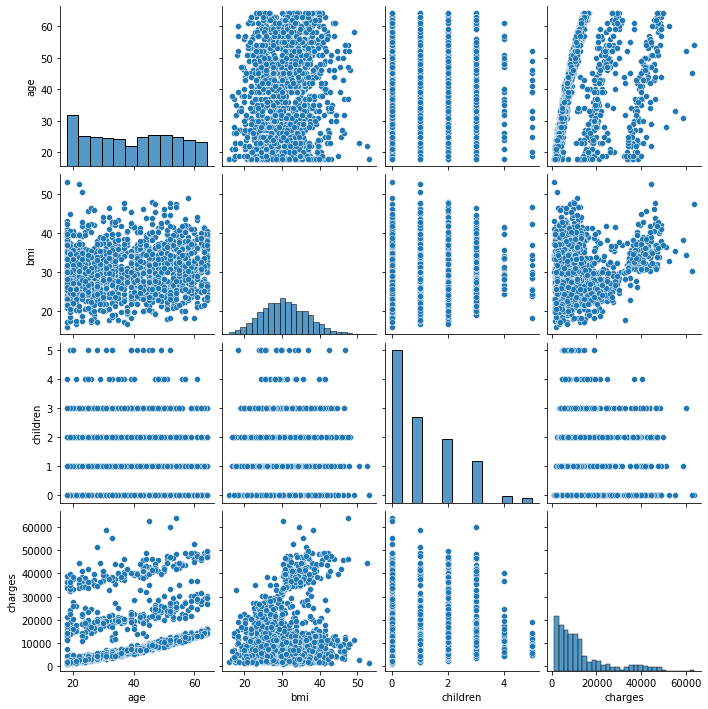

In [7]:
# Visualization of the data

sns.pairplot(insurance)

<AxesSubplot:ylabel='age'>

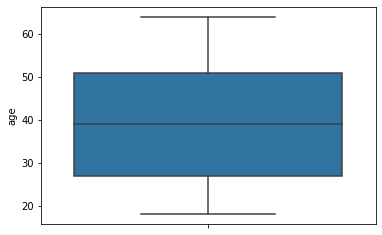

In [8]:
# Outlier detection using boxplot

sns.boxplot(y='age',data=insurance)

<AxesSubplot:ylabel='bmi'>

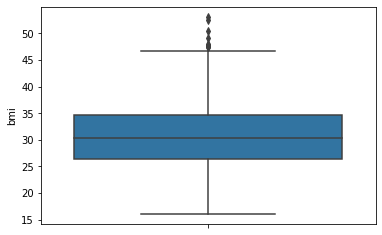

In [9]:
sns.boxplot(y='bmi',data=insurance)

<AxesSubplot:ylabel='children'>

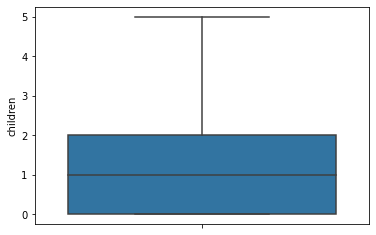

In [10]:
sns.boxplot(y='children',data=insurance)

<AxesSubplot:ylabel='charges'>

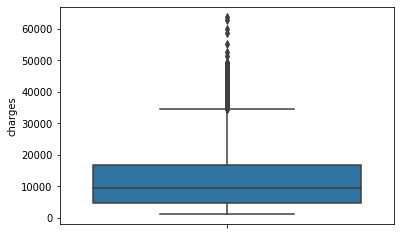

In [11]:
sns.boxplot(y='charges',data=insurance)

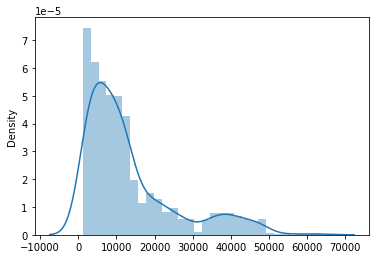

In [12]:
# Distribution plot of the target variable

sns.distplot(x=insurance['charges'])
plt.show()

In [13]:
insurance['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [14]:
# Outliers detected
# Outlier treatment using Z-score method

from scipy import stats
insurance['charges_stats']=stats.zscore(insurance['charges'])
insurance[['charges_stats','charges']].describe().round(3)
def find_outliers(col):
    z=np.abs(stats.zscore(col))
    idx_outliers=np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)
idx=find_outliers(insurance['charges'])
idx
display(insurance.loc[idx==True].describe().round(3))
display(insurance.loc[idx==False].describe().round(3))
insurance=insurance.loc[idx==False]
insurance_outliers=pd.DataFrame()
for col in insurance.describe().columns:
    insurance_outliers[col]=find_outliers(insurance[col])
insurance_outliers.head()
test_outs=insurance_outliers.apply(lambda x: np.any(x),axis=1)
print(len(test_outs),insurance_outliers.shape)
test_outs
np.sum(test_outs)
insurance_clean=insurance.loc[test_outs==False]
insurance_clean.describe()

,age,bmi,children,charges,charges_stats
count,7.000,7.000,7.000,7.000,7.000
mean,43.286,36.440,0.714,57696.652,3.670
std,12.672,5.446,1.113,4863.802,0.402
min,28.000,30.360,0.000,51194.559,3.133
25%,32.000,33.642,0.000,53863.116,3.353
50%,45.000,35.530,0.000,58571.074,3.742
75%,53.000,37.248,1.000,61307.136,3.968
max,60.000,47.410,3.000,63770.428,4.172


,age,bmi,children,charges,charges_stats
count,1331.000,1331.000,1331.000,1331.000,1331.000
mean,39.186,30.633,1.097,13036.776,-0.019
std,14.058,6.089,1.206,11699.360,0.966
min,18.000,15.960,0.000,1121.874,-1.004
25%,26.000,26.220,0.000,4719.630,-0.706
50%,39.000,30.305,1.000,9301.894,-0.328
75%,51.000,34.600,2.000,16359.170,0.255
max,64.000,53.130,5.000,49577.662,2.999


1331 (1331, 5)


,age,bmi,children,charges,charges_stats
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,39.132308,30.523650,1.046154,12842.668365,-0.035336
std,14.039185,5.949355,1.125405,11395.673333,0.941364
min,18.000000,15.960000,0.000000,1121.873900,-1.003557
25%,26.000000,26.220000,0.000000,4669.881912,-0.710466
50%,39.000000,30.275000,1.000000,9289.083100,-0.328887
75%,51.000000,34.430000,2.000000,16121.168887,0.235492
max,64.000000,48.070000,4.000000,47928.030000,2.862967


<AxesSubplot:ylabel='bmi'>

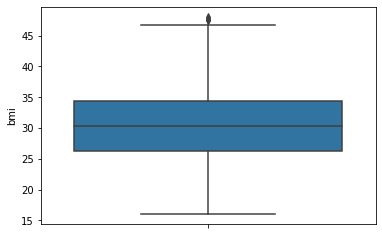

In [15]:
sns.boxplot(y='bmi',data=insurance_clean)

<AxesSubplot:ylabel='charges'>

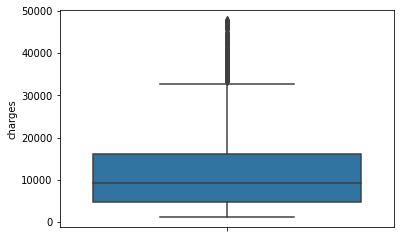

In [16]:
sns.boxplot(y='charges',data=insurance_clean)

In [17]:
# One-hot Encoding for the independent category/object variables

insurance_clean['smoker']=insurance_clean['smoker'].astype('category')
insurance_clean['smoker']=insurance_clean['smoker'].cat.codes
insurance_clean=pd.get_dummies(insurance_clean,columns=['smoker'])

In [18]:
insurance_clean['region']=insurance_clean['region'].astype('category')
insurance_clean['region']=insurance_clean['region'].cat.codes
insurance_clean=pd.get_dummies(insurance_clean,columns=['region'])

In [19]:
insurance_clean['sex']=insurance_clean['sex'].astype('category')
insurance_clean['sex']=insurance_clean['sex'].cat.codes
insurance_clean=pd.get_dummies(insurance_clean,columns=['sex'])

In [20]:
insurance_clean.drop(['smoker_0','region_0','sex_0'],axis=1,inplace=True)

In [21]:
insurance_clean.head()

,age,bmi,children,charges,charges_stats,smoker_1,region_1,region_2,region_3,sex_1
0,19,27.900,0,16884.92400,0.298584,1,0,0,1,0
1,18,33.770,1,1725.55230,-0.953689,0,0,1,0,1
2,28,33.000,3,4449.46200,-0.728675,0,0,1,0,1
3,33,22.705,0,21984.47061,0.719843,0,1,0,0,1
4,32,28.880,0,3866.85520,-0.776802,0,1,0,0,1


In [22]:
# Multicollinearity check using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
insurance_col=insurance_clean.drop(['charges','charges_stats'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"]=insurance_col.columns
vif_data["VIF"]=[variance_inflation_factor(insurance_col.values, i)for i in range(len(insurance_col.columns))]

In [23]:
vif_data

,feature,VIF
0,age,7.715174
1,bmi,11.410707
2,children,1.866889
3,smoker_1,1.246416
4,region_1,1.907911
5,region_2,2.224091
6,region_3,1.948210
7,sex_1,1.986239


### Multicollinearity seems pretty normal as almost every variable has variance below 10

In [24]:
x=insurance_col
y=insurance_clean['charges']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Scaling the variables

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x= sc.fit_transform(x)

In [27]:
# Performing train test split on the dataset

x_train,x_test,y_train,y_test=train_test_split(sc_x,y,test_size=0.80,random_state=401)

# LINEAR REGRESSION

In [28]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

In [29]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_lr))
from sklearn.metrics import mean_squared_error
mse_lr=mean_squared_error(y_test,y_pred_lr)
print('Mean squared error with feature selection: {}'.format(np.round(mse_lr,2)))

0.736157389544616
Mean squared error with feature selection: 35067272.01


In [30]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sf
lr_model=sf.OLS(endog=y_train,exog=x_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.318
Model:                            OLS   Adj. R-squared (uncentered):              0.297
Method:                 Least Squares   F-statistic:                              14.71
Date:                Tue, 23 Aug 2022   Prob (F-statistic):                    1.28e-17
Time:                        05:27:22   Log-Likelihood:                         -2847.9
No. Observations:                 260   AIC:                                      5712.
Df Residuals:                     252   BIC:                                      5740.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3953.7644    866.222      4.564      0.000    2247.808    5659.721
x2           928.4564    937.531      0.990      0.323    -917.939    2774.852
x3          -249.4898    905.355     -0.276      0.783   -2032.515    1533.536
x4          9320.2210    910.276     10.239      0.000    7527.503    1.11e+04
x5          -258.9800   1086.361     -0.238      0.812   -2398.484    1880.524
x6          -994.7243   1125.739     -0.884      0.378   -3211.779    1222.330
x7          -124.5386   1058.369     -0.118      0.906   -2208.914    1959.837
x8         -1411.3079    886.995     -1.591      0.113   -3158.176     335.560
==============================================================================
Omnibus:                       54.667   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.881
Skew:                           1.085   Prob(JB):                     2.77e-23
Kurtosis:                       5.210   Cond. No.                         2.17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Density'>

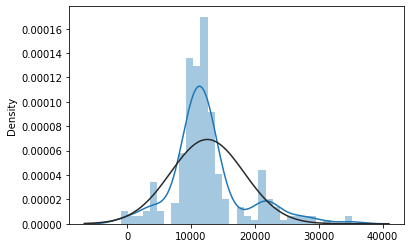

In [31]:
from scipy import stats
sns.distplot(lr_model.resid,fit=stats.norm)

<AxesSubplot:>

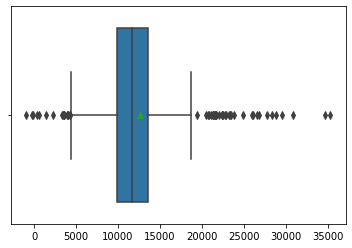

In [32]:
sns.boxplot(lr_model.resid,showmeans=True)

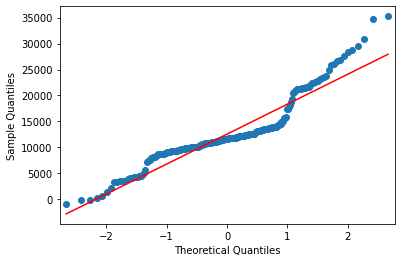

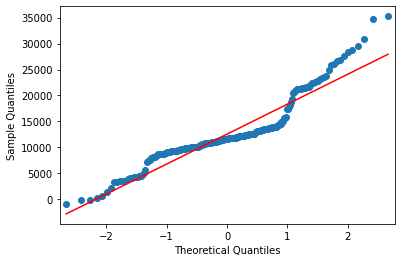

In [33]:
import statsmodels.api as sm
sm.qqplot(lr_model.resid,line='s')

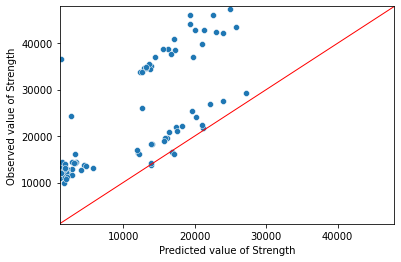

In [34]:
Y_max = y.max()
Y_min = y.min()
ax = sns.scatterplot(lr_model.fittedvalues, y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

# LASSO REGRESSION

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test),lasso.score(x_train, y_train)

(0.7361683281088736, 0.7499518866655193)

In [36]:
print(lasso.coef_)

[3171.01117621 1778.66708957  743.29900324 9209.40245872  282.71782052
 -611.15189574 -334.18652212 -173.52699894]


In [37]:
y_pred_lasso=lasso.predict(x_test)
print(r2_score(y_test,y_pred_lasso))

0.7361683281088736


# POLYNOMIAL REGRESSION

In [36]:
x_train_poly=x_train
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
poly_df=poly.fit_transform(x_train_poly)
lin=LinearRegression()
lin.fit(poly_df,y_train)
y_pred_poly=lin.predict(poly_df)

In [37]:
print(r2_score(y_train,y_pred_poly))

0.972021754111332


# XGBOOST REGRESSION

In [38]:
from xgboost import XGBRegressor
xgb= XGBRegressor(objective ='reg:squarederror',n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)

In [39]:
print(r2_score(y_test,y_pred_xgb))

0.7806976093867682


# DECISION TREE REGRESSION

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

In [41]:
print(r2_score(y_test,y_pred_dt))

0.6778060569524049


# RANDOM FOREST REGRESSION

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_train)

In [43]:
print(r2_score(y_train,y_pred_rf))

0.9768276521101651
